In [79]:
import pandas as pd 

data_main=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.03/data_norm.xlsx")

data_main

data=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.03/data_drop.xlsx")

In [80]:
data_main

,Unnamed: 0,FORCE_B(Right),"FORCE_C(Left),",FSR DATA_B(Right),FSR DATA_C(Left)
0,0,0.705263,0.706522,0.772727,0.68
1,1,0.715789,0.714674,0.727273,0.66
2,2,0.747368,0.747283,0.727273,0.64
3,3,0.768421,0.709239,0.681818,0.58
4,4,0.842105,0.684783,0.681818,0.56
...,...,...,...,...,...
608,608,0.505263,0.929348,0.363636,0.62
609,609,0.242105,0.910326,0.409091,0.64
610,610,0.473684,0.918478,0.500000,0.62
611,611,0.400000,0.891304,0.636364,0.56


In [81]:
data

,Unnamed: 0,FORCE_B(Right),"FORCE_C(Left),",FSR DATA_B(Right),FSR DATA_C(Left)
0,0,0.705263,0.706522,0.772727,0.68
1,1,0.715789,0.714674,0.727273,0.66
2,2,0.747368,0.747283,0.727273,0.64
3,3,0.768421,0.709239,0.681818,0.58
4,4,NaN,NaN,NaN,NaN
...,...,...,...,...,...
608,608,0.505263,0.929348,0.363636,0.62
609,609,0.242105,0.910326,0.409091,0.64
610,610,0.473684,0.918478,0.500000,0.62
611,611,0.400000,0.891304,0.636364,0.56


In [82]:
data_main.drop(columns=['Unnamed: 0'],inplace=True)
data.drop(columns=['Unnamed: 0'],inplace=True)

<Axes: >

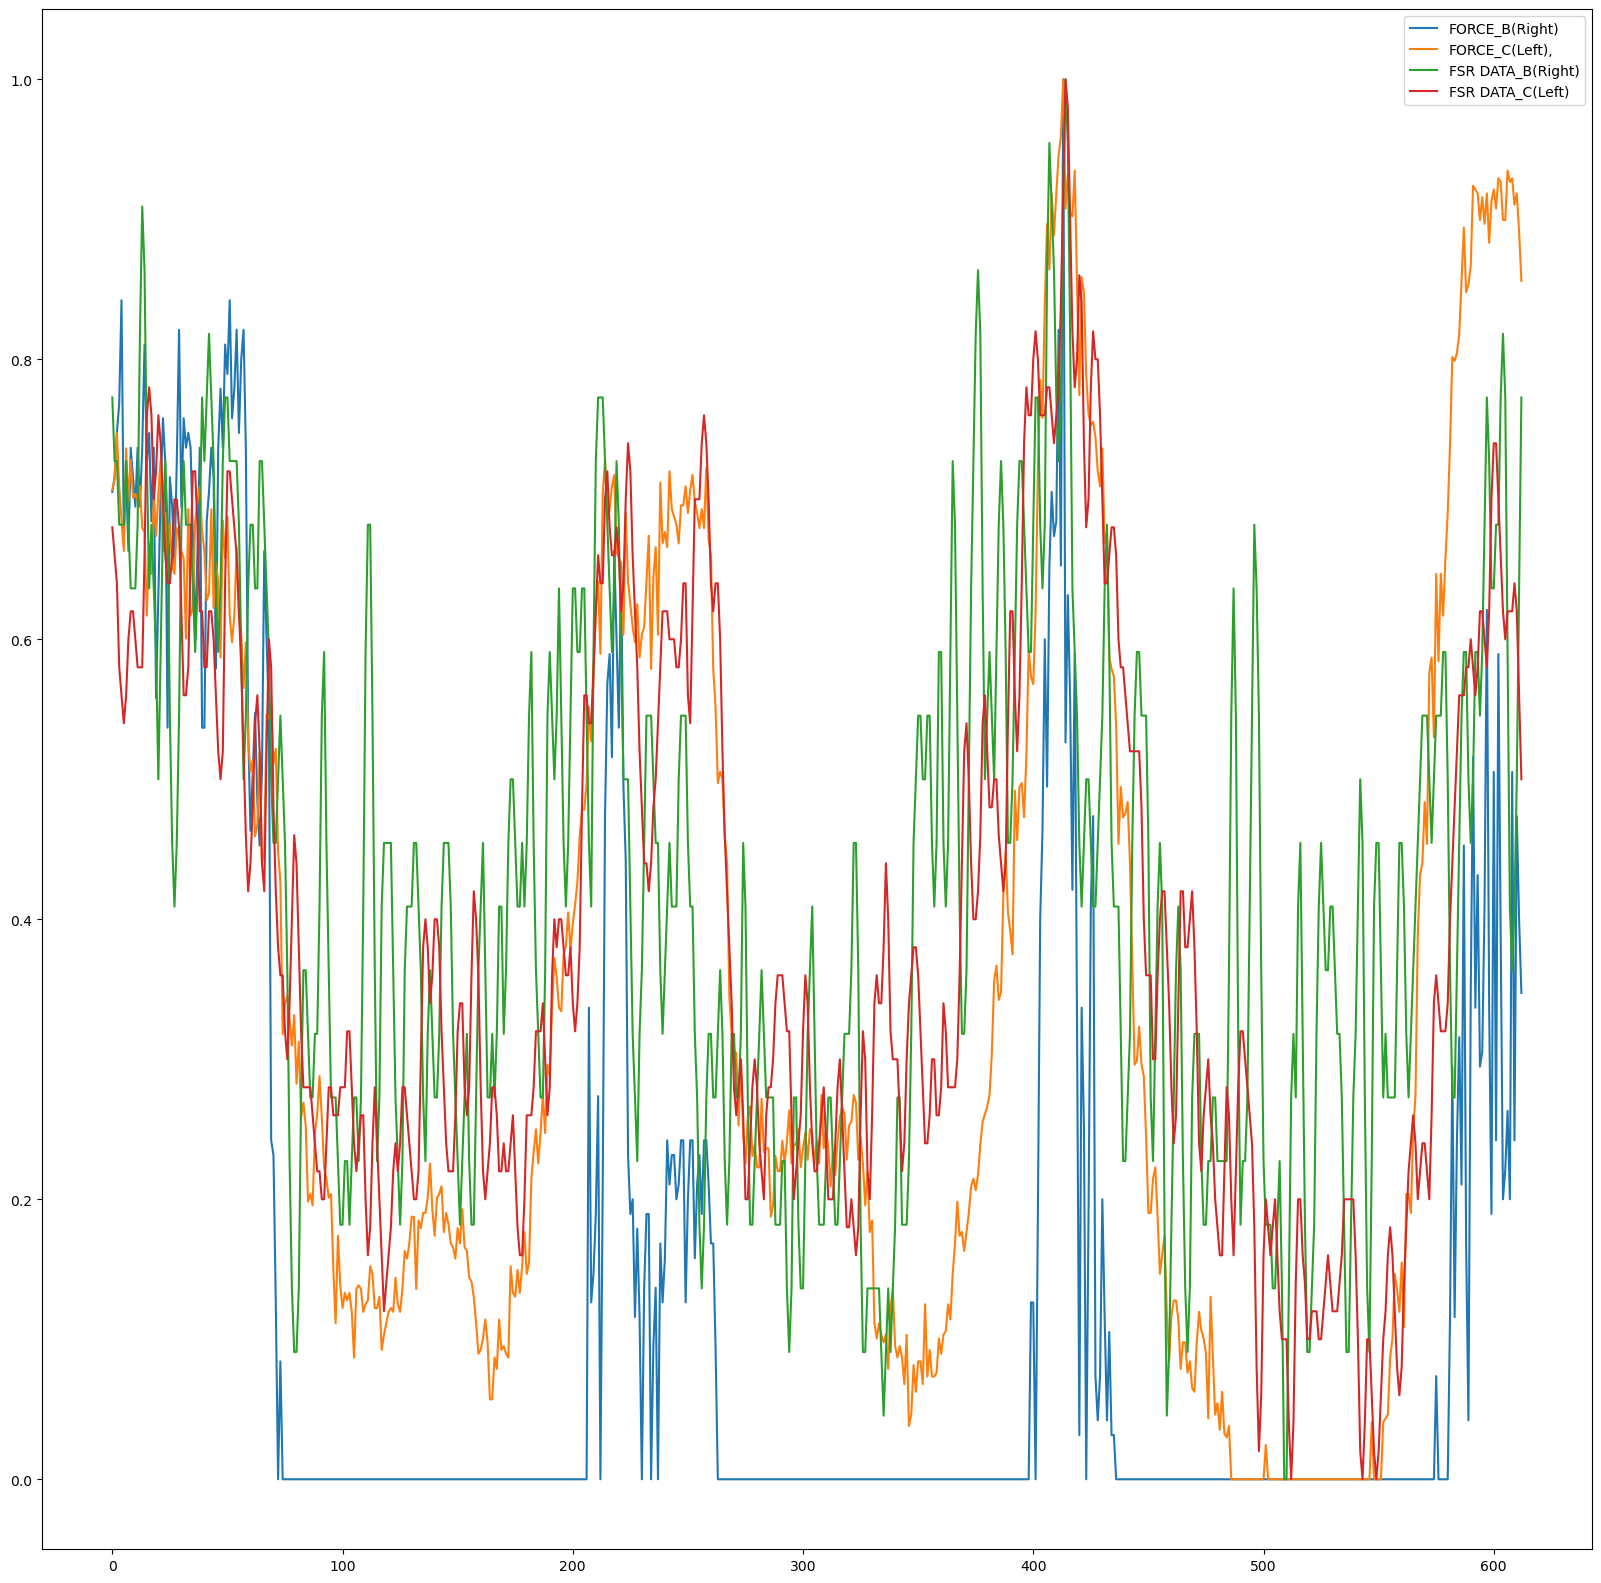

In [83]:
data_main.plot(figsize=(20,20))

<Axes: >

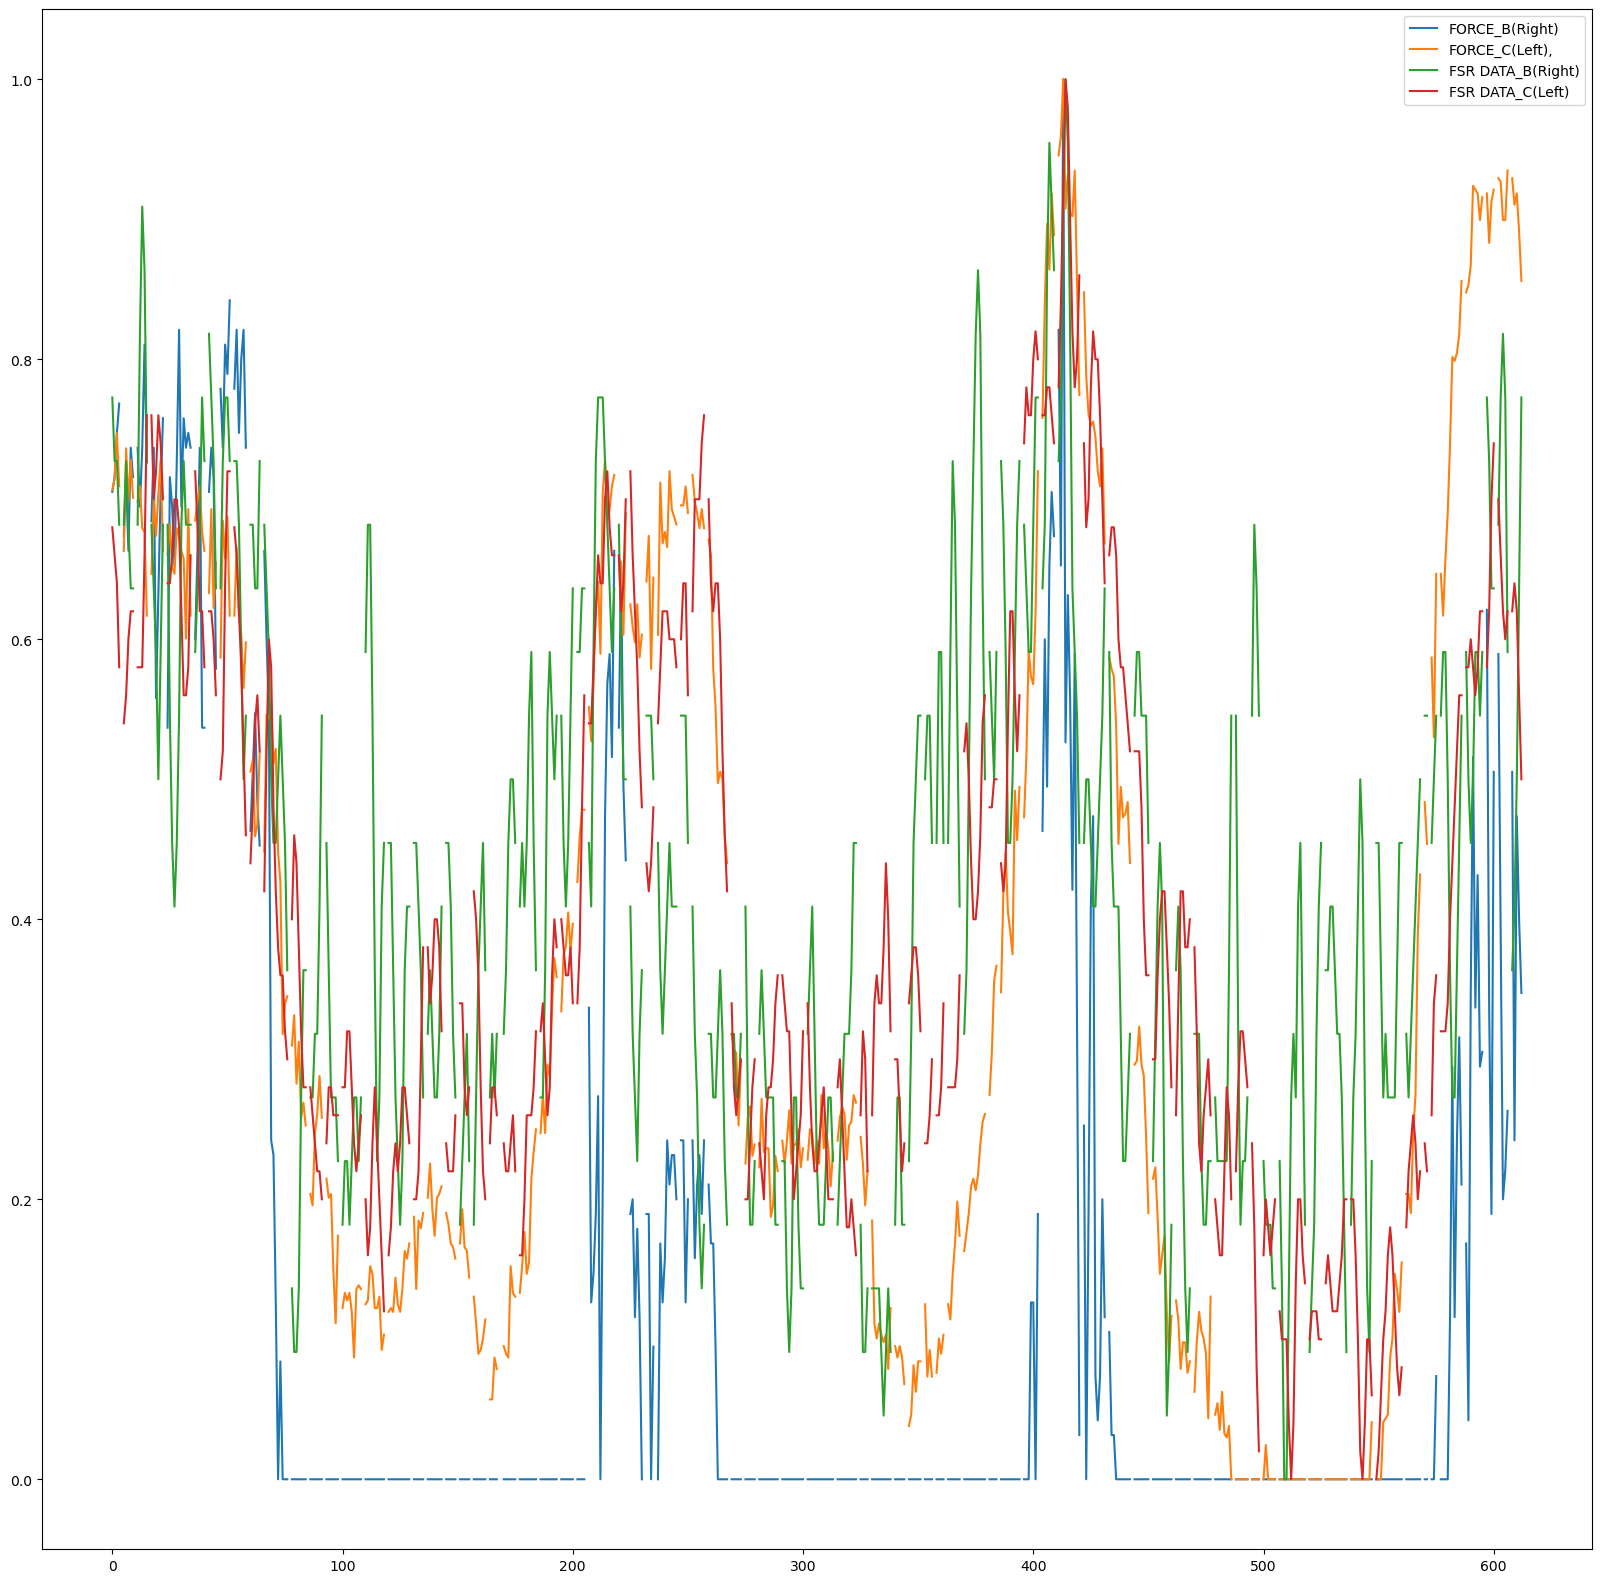

In [84]:
data.plot(figsize=(20,20))

In [85]:
print(data.isnull().sum())
print(data_main.isnull().sum())

FORCE_B(Right)       78
FORCE_C(Left),       78
FSR DATA_B(Right)    78
FSR DATA_C(Left)     78
dtype: int64
FORCE_B(Right)       0
FORCE_C(Left),       0
FSR DATA_B(Right)    0
FSR DATA_C(Left)     0
dtype: int64


FORCE_B(Right)


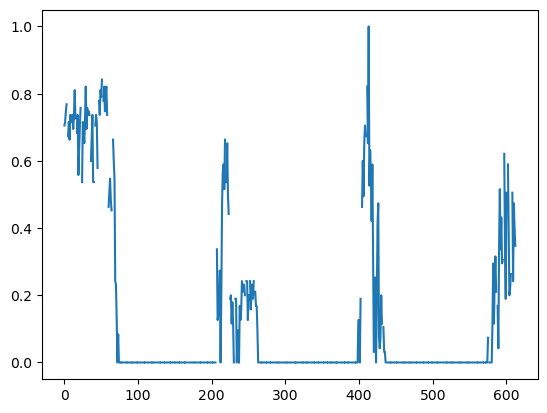

FORCE_C(Left),


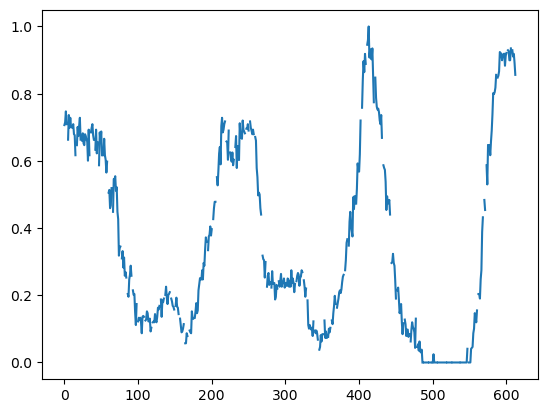

FSR DATA_B(Right)


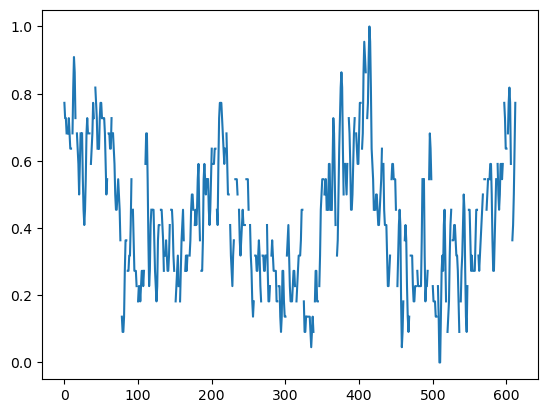

FSR DATA_C(Left)


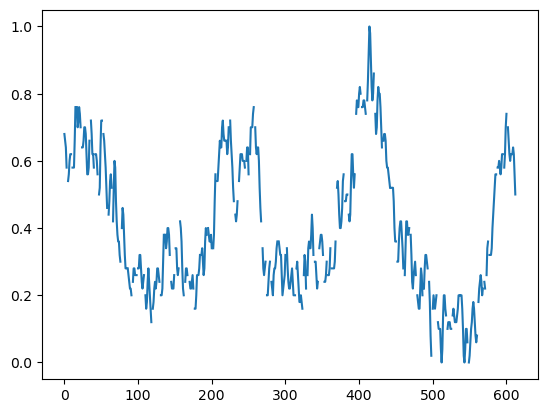

In [86]:
import matplotlib.pyplot as plt

columns=data.columns
count=0
for i in columns:
    print(columns[count])
    count=count+1
    plt.plot(data[i])
    plt.show()
    

In [87]:
## R_FORCE_B : L_FORCE_C
## R_FORCE_B : L_FSR_C : 

In [88]:
data_sca=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.03/data_norm.xlsx")
data_sca.drop(columns=["Unnamed: 0","FORCE_B(Right)","FSR DATA_B(Right)"],inplace=True)




In [89]:
data_sca.columns

Index(['FORCE_C(Left),', 'FSR DATA_C(Left)'], dtype='object')

In [90]:
from sklearn.preprocessing import MinMaxScaler

data2=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.03/data_target.xlsx")

R2=data2.loc[:,['FORCE_B(Right)','FSR DATA_B(Right)']]

scaler=MinMaxScaler()
R_scaled=scaler.fit_transform(R2)

R3=pd.DataFrame(data=R_scaled)

R_new=R3.set_axis(["FORCE_B(Right)","FSR DATA_B(Right)"],axis="columns")

R=data.loc[:,['FORCE_B(Right)','FSR DATA_B(Right)']]
L=data.loc[:,['FORCE_C(Left),','FSR DATA_C(Left)']]


In [91]:
data.columns

Index(['FORCE_B(Right)', 'FORCE_C(Left),', 'FSR DATA_B(Right)',
       'FSR DATA_C(Left)'],
      dtype='object')

In [92]:
R=data.loc[:,['FORCE_B(Right)','FSR DATA_B(Right)']]
L=data.loc[:,['FORCE_C(Left),','FSR DATA_C(Left)']]

<Axes: >

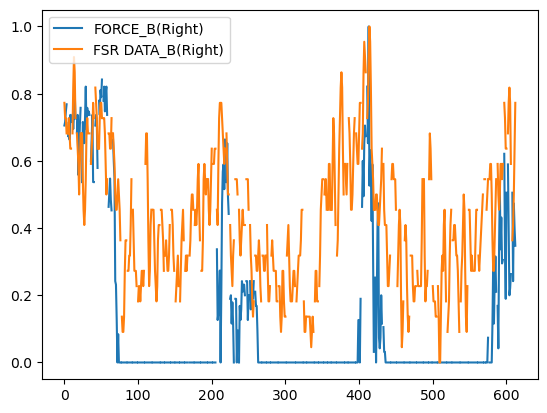

In [93]:
R.plot()

<Axes: >

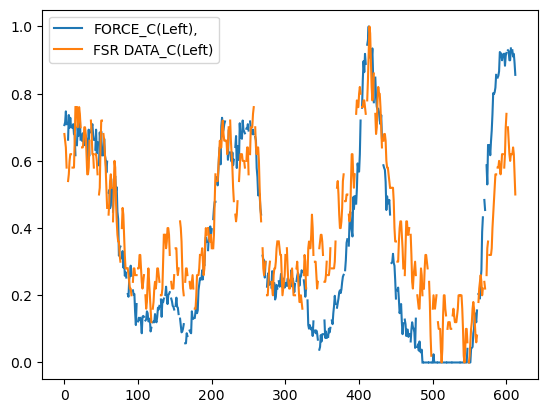

In [94]:
L.plot()

In [95]:
import numpy as np

index=R.index

loss_index_R_FORECE_B=np.array(R.index).reshape(-1,1)[R.iloc[:,0].isna()]
loss_index_R_FSR_B=np.array(R.index).reshape(-1,1)[R.iloc[:,1].isna()]

normal_index_R_FORECE_B=np.setdiff1d(index,loss_index_R_FORECE_B)
normal_index_R_FSR_B=np.setdiff1d(index,loss_index_R_FSR_B)

In [96]:
index=L.index

loss_index_L_FORECE_C=np.array(L.index).reshape(-1,1)[L.iloc[:,0].isna()]
loss_index_L_FSR_C=np.array(L.index).reshape(-1,1)[L.iloc[:,1].isna()]

normal_index_L_FORECE_C=np.setdiff1d(index,loss_index_L_FORECE_C)
normal_index_L_FSR_C=np.setdiff1d(index,loss_index_L_FSR_C)

In [97]:
## R_FORCE_B : L_FORCE_C
##  R_FORCE_B : L_FSR_C 

In [98]:
x_train_R_FORECE_B=normal_index_R_FORECE_B.reshape(-1,1)
y_train_L_FORECE_C=L.iloc[normal_index_L_FORECE_C,0]
x_test_L_FORECE_C=loss_index_L_FORECE_C

y_train_L_FSR_C=L.iloc[normal_index_L_FORECE_C,1]
x_test_L_FSR_C=loss_index_L_FSR_C

L_FORCE_C=L.iloc[:,0].copy()
L_FSR_C=L.iloc[:,1].copy()

In [99]:
print(x_train_R_FORECE_B.shape)
print(y_train_L_FORECE_C.shape)

(535, 1)
(535,)


In [100]:
x_train_R_FORECE_B=x_train_R_FORECE_B.reshape(x_train_R_FORECE_B.shape[0],x_train_R_FORECE_B.shape[1],1)
x_test_L_FORECE_C=x_test_L_FORECE_C.reshape(x_test_L_FORECE_C.shape[0],x_test_L_FORECE_C.shape[1],1)
x_test_L_FSR_C=x_test_L_FSR_C.reshape(x_test_L_FSR_C.shape[0],x_test_L_FSR_C.shape[1],1)

In [101]:
print(x_train_R_FORECE_B.shape)
print(y_train_L_FORECE_C.shape)

(535, 1, 1)
(535,)


In [102]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from tensorflow.keras import layers
from keras.layers import Activation, Dense
import tensorflow as tf 
from tensorflow.keras import Model
from keras.layers import Dropout
from keras.layers import Dense, Input, TimeDistributed, Flatten
from keras.layers.convolutional import Conv1D ,MaxPooling1D
from keras.optimizers import adam
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=150, kernel_size=1, activation='relu'), input_shape=(None, x_train_R_FORECE_B.shape[1], x_train_R_FORECE_B.shape[2])))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(400, activation='relu'))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer='adam')
model_cnn_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_6 (TimeDis  (None, None, 1, 150)     300       
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, None, 1, 150)     0         
 tributed)                                                       
                                                                 
 time_distributed_8 (TimeDis  (None, None, 150)        0         
 tributed)                                                       
                                                                 
 lstm_2 (LSTM)               (None, 400)               881600    
                                                                 
 dense_2 (Dense)             (None, 1)                 401       
                                                      

In [104]:
model_cnn_lstm.fit(x_train_R_FORECE_B,y_train_L_FORECE_C,epochs=3000,verbose=2,batch_size=8,shuffle=True)
pred=model_cnn_lstm.predict(x_test_L_FORECE_C)
pred=pred.reshape(-1,1)

Epoch 1/3000
67/67 - 0s - loss: 0.0591 - 228ms/epoch - 3ms/step
Epoch 2/3000
67/67 - 0s - loss: 0.0530 - 242ms/epoch - 4ms/step
Epoch 3/3000
67/67 - 0s - loss: 0.0535 - 180ms/epoch - 3ms/step
Epoch 4/3000
67/67 - 0s - loss: 0.0532 - 209ms/epoch - 3ms/step
Epoch 5/3000
67/67 - 0s - loss: 0.0535 - 218ms/epoch - 3ms/step
Epoch 6/3000
67/67 - 0s - loss: 0.0545 - 177ms/epoch - 3ms/step
Epoch 7/3000
67/67 - 0s - loss: 0.0543 - 239ms/epoch - 4ms/step
Epoch 8/3000
67/67 - 0s - loss: 0.0542 - 177ms/epoch - 3ms/step
Epoch 9/3000
67/67 - 0s - loss: 0.0538 - 237ms/epoch - 4ms/step
Epoch 10/3000
67/67 - 0s - loss: 0.0530 - 202ms/epoch - 3ms/step
Epoch 11/3000
67/67 - 0s - loss: 0.0538 - 177ms/epoch - 3ms/step
Epoch 12/3000
67/67 - 0s - loss: 0.0544 - 190ms/epoch - 3ms/step
Epoch 13/3000
67/67 - 0s - loss: 0.0538 - 187ms/epoch - 3ms/step
Epoch 14/3000
67/67 - 0s - loss: 0.0541 - 171ms/epoch - 3ms/step
Epoch 15/3000
67/67 - 0s - loss: 0.0540 - 204ms/epoch - 3ms/step
Epoch 16/3000
67/67 - 0s - loss: 0

In [105]:
c=0
for i in loss_index_L_FORECE_C:    
    L_FORCE_C[i]=pred[c]
    c+=1

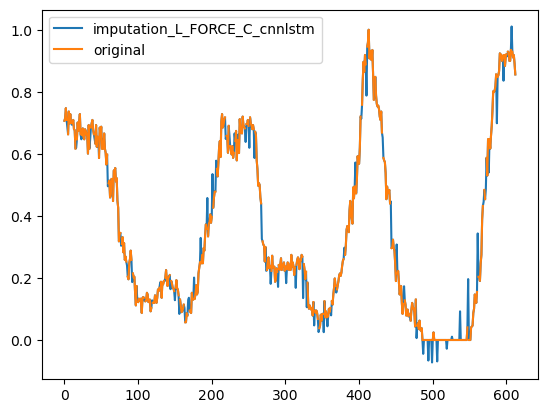

In [106]:
import matplotlib.pyplot as plt 
plt.plot(L_FORCE_C,label='imputation_L_FORCE_C_cnnlstm')
plt.plot(L.iloc[:,0],label='original')
plt.legend()

In [107]:
model_cnn_lstm.fit(x_train_R_FORECE_B,y_train_L_FSR_C,epochs=3000,verbose=2,batch_size=8,shuffle=True)


Epoch 1/3000
67/67 - 0s - loss: 0.0197 - 245ms/epoch - 4ms/step
Epoch 2/3000
67/67 - 0s - loss: 0.0129 - 179ms/epoch - 3ms/step
Epoch 3/3000
67/67 - 0s - loss: 0.0154 - 177ms/epoch - 3ms/step
Epoch 4/3000
67/67 - 0s - loss: 0.0140 - 230ms/epoch - 3ms/step
Epoch 5/3000
67/67 - 0s - loss: 0.0192 - 227ms/epoch - 3ms/step
Epoch 6/3000
67/67 - 0s - loss: 0.0123 - 186ms/epoch - 3ms/step
Epoch 7/3000
67/67 - 0s - loss: 0.0068 - 182ms/epoch - 3ms/step
Epoch 8/3000
67/67 - 0s - loss: 0.0076 - 184ms/epoch - 3ms/step
Epoch 9/3000
67/67 - 0s - loss: 0.0068 - 182ms/epoch - 3ms/step
Epoch 10/3000
67/67 - 0s - loss: 0.0065 - 181ms/epoch - 3ms/step
Epoch 11/3000
67/67 - 0s - loss: 0.0076 - 184ms/epoch - 3ms/step
Epoch 12/3000
67/67 - 0s - loss: 0.0072 - 183ms/epoch - 3ms/step
Epoch 13/3000
67/67 - 0s - loss: 0.0092 - 182ms/epoch - 3ms/step
Epoch 14/3000
67/67 - 0s - loss: 0.0065 - 184ms/epoch - 3ms/step
Epoch 15/3000
67/67 - 0s - loss: 0.0065 - 181ms/epoch - 3ms/step
Epoch 16/3000
67/67 - 0s - loss: 0

In [108]:
pred=model_cnn_lstm.predict(x_test_L_FSR_C)
pred=pred.reshape(-1,1)

3/3 [==============================] - 0s 2ms/step


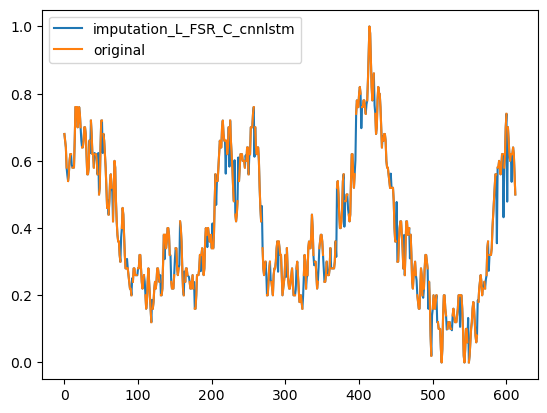

In [109]:
c=0
for i in loss_index_L_FSR_C:    
    L_FSR_C[i]=pred[c]
    c+=1
    
    
plt.plot(L_FSR_C,label='imputation_L_FSR_C_cnnlstm')
plt.plot(L.iloc[:,1],label='original')
plt.legend()

In [110]:
data_main.columns

Index(['FORCE_B(Right)', 'FORCE_C(Left),', 'FSR DATA_B(Right)',
       'FSR DATA_C(Left)'],
      dtype='object')

In [111]:
import numpy as np

def RMSE(data,pred):
    n=len(data)
    return np.sqrt((np.sum((data-pred)**2))/n)

print(RMSE(data_main['FORCE_C(Left),'],L_FORCE_C))
print(RMSE(data_main['FSR DATA_C(Left)'],L_FSR_C))

0.02532604475902041
0.028849843632644374


In [112]:
L.isnull().sum()

FORCE_C(Left),      78
FSR DATA_C(Left)    78
dtype: int64

In [113]:
for i in loss_index_L_FORECE_C:    
    L['FORCE_C(Left),'][i]=L_FORCE_C[i]
    
for i in loss_index_L_FSR_C:    
    L['FSR DATA_C(Left)'][i]=L_FSR_C[i]

In [114]:
L

,"FORCE_C(Left),",FSR DATA_C(Left)
0,0.706522,0.680000
1,0.714674,0.660000
2,0.747283,0.640000
3,0.709239,0.580000
4,0.686138,0.557285
...,...,...
608,0.929348,0.620000
609,0.910326,0.640000
610,0.918478,0.620000
611,0.891304,0.560000


<Axes: >

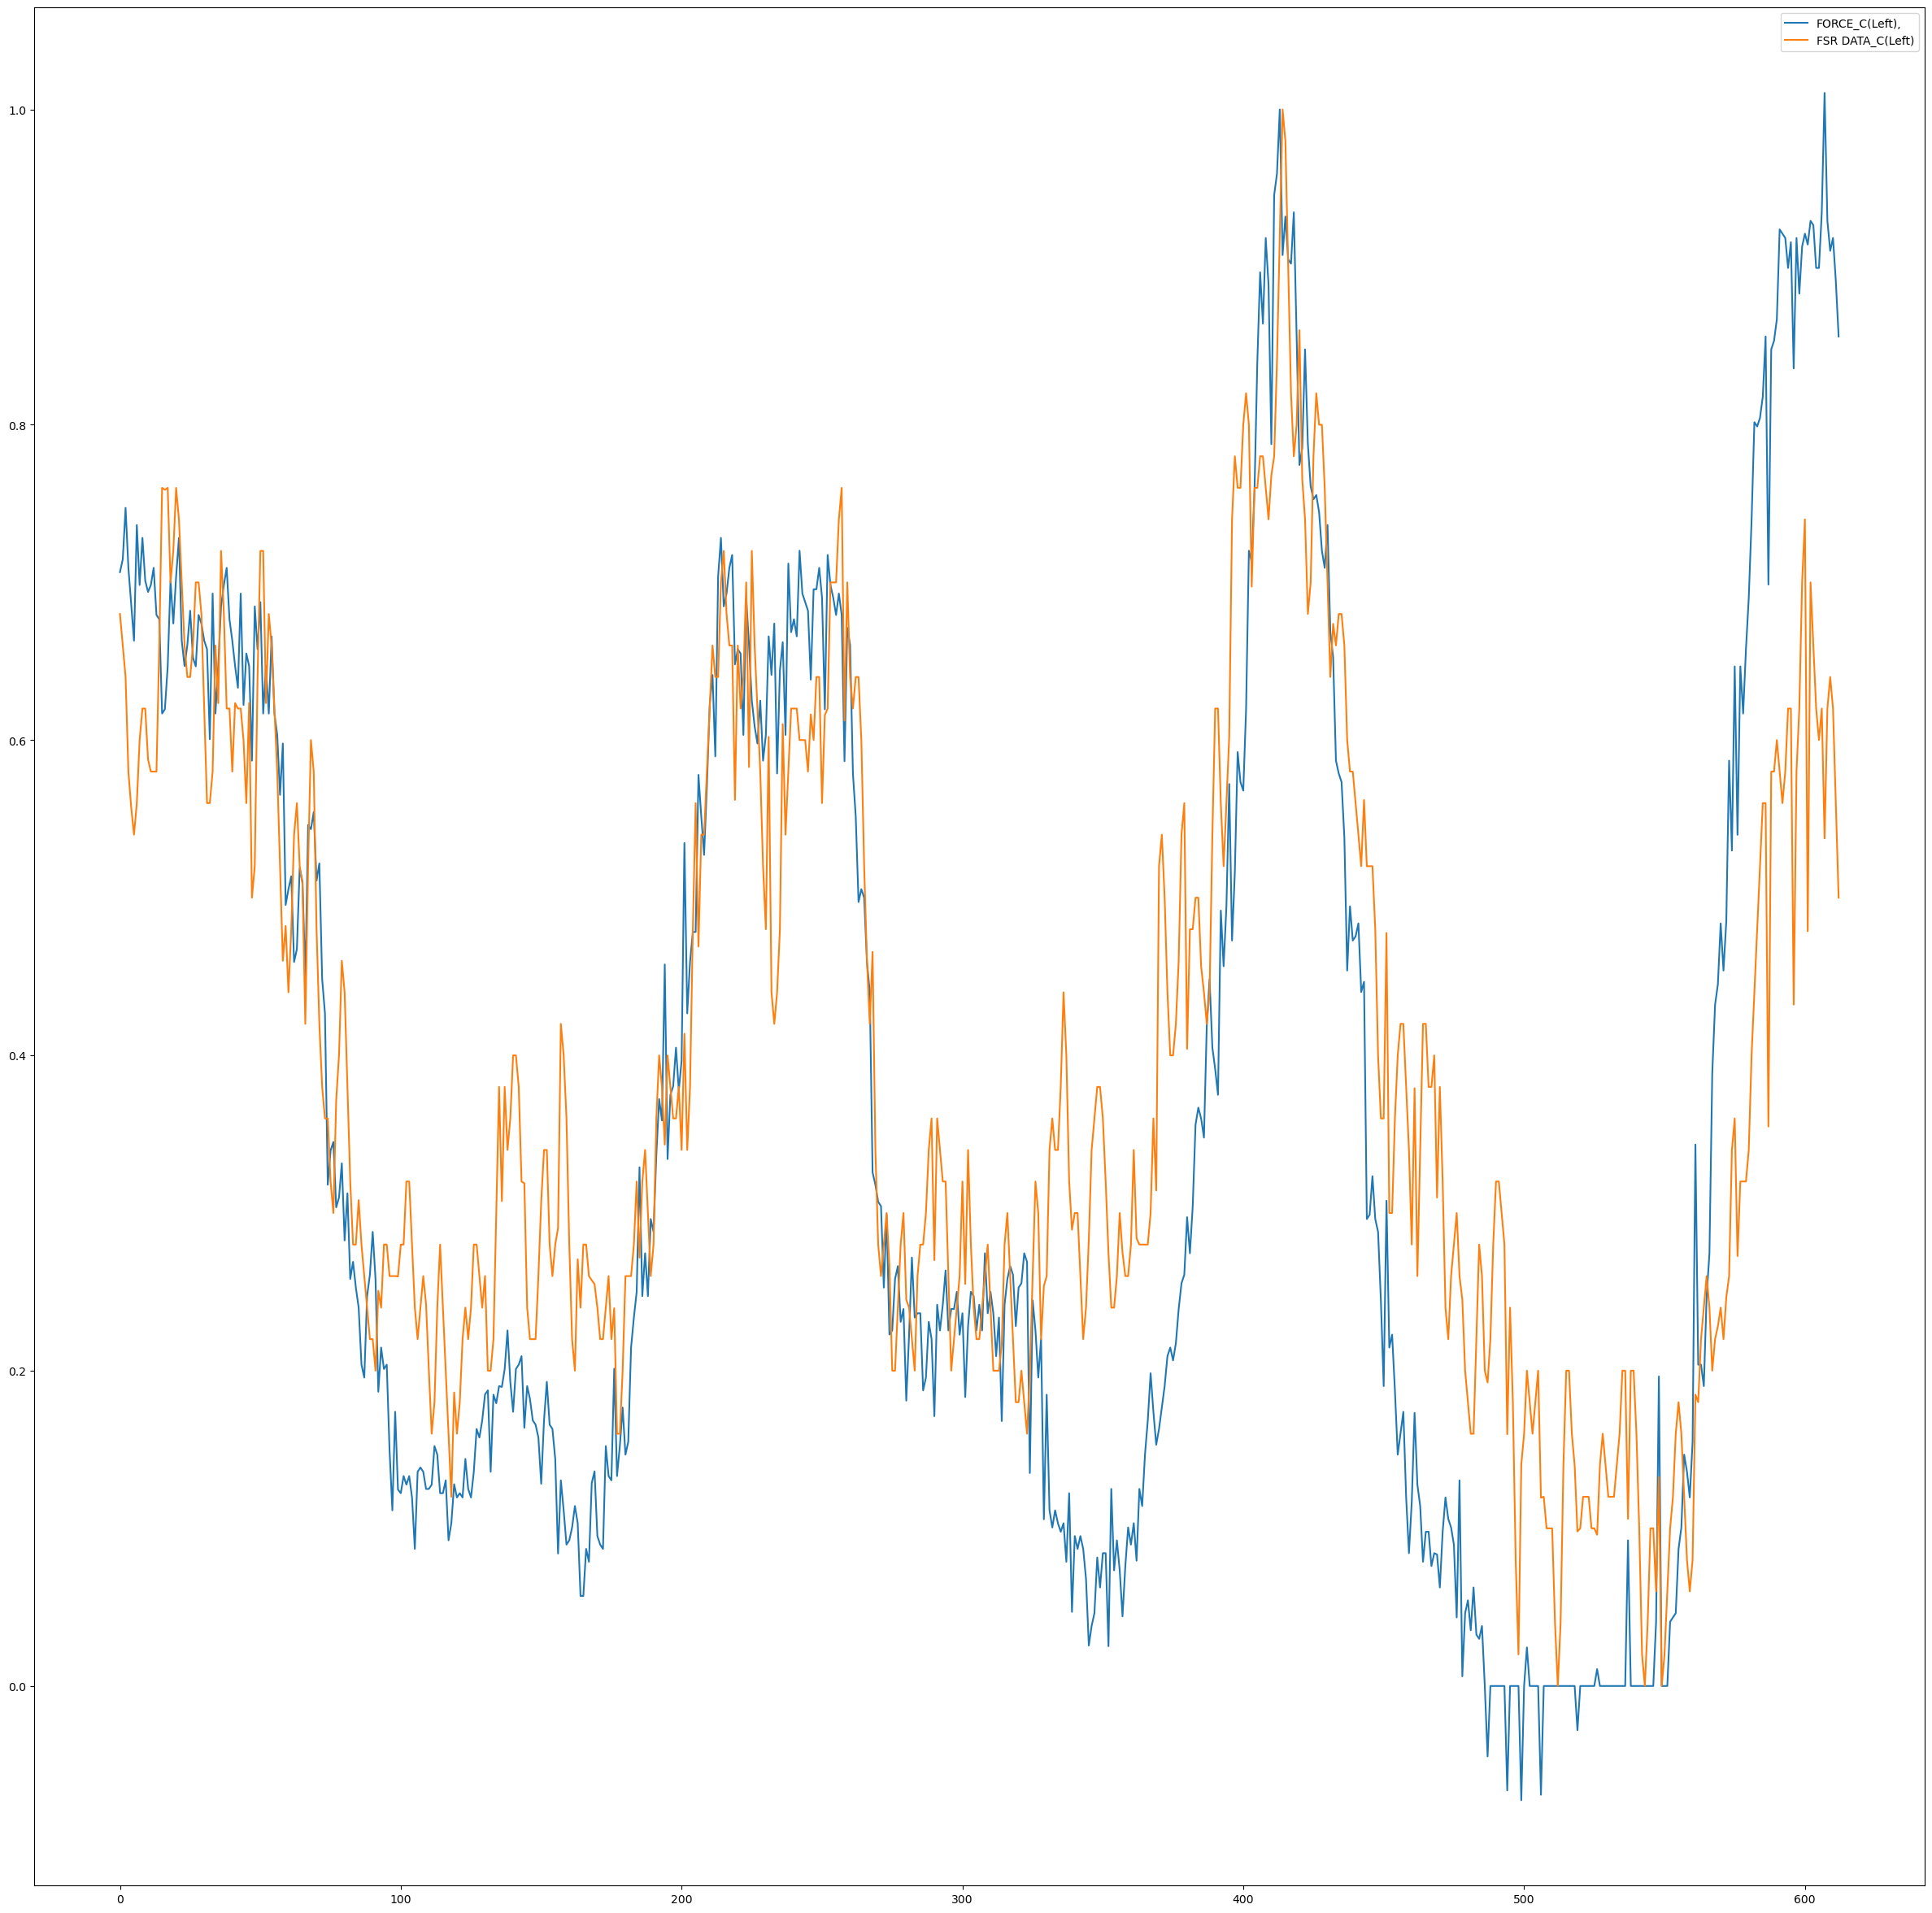

In [115]:
L.plot(figsize=(30,30))

<Axes: >

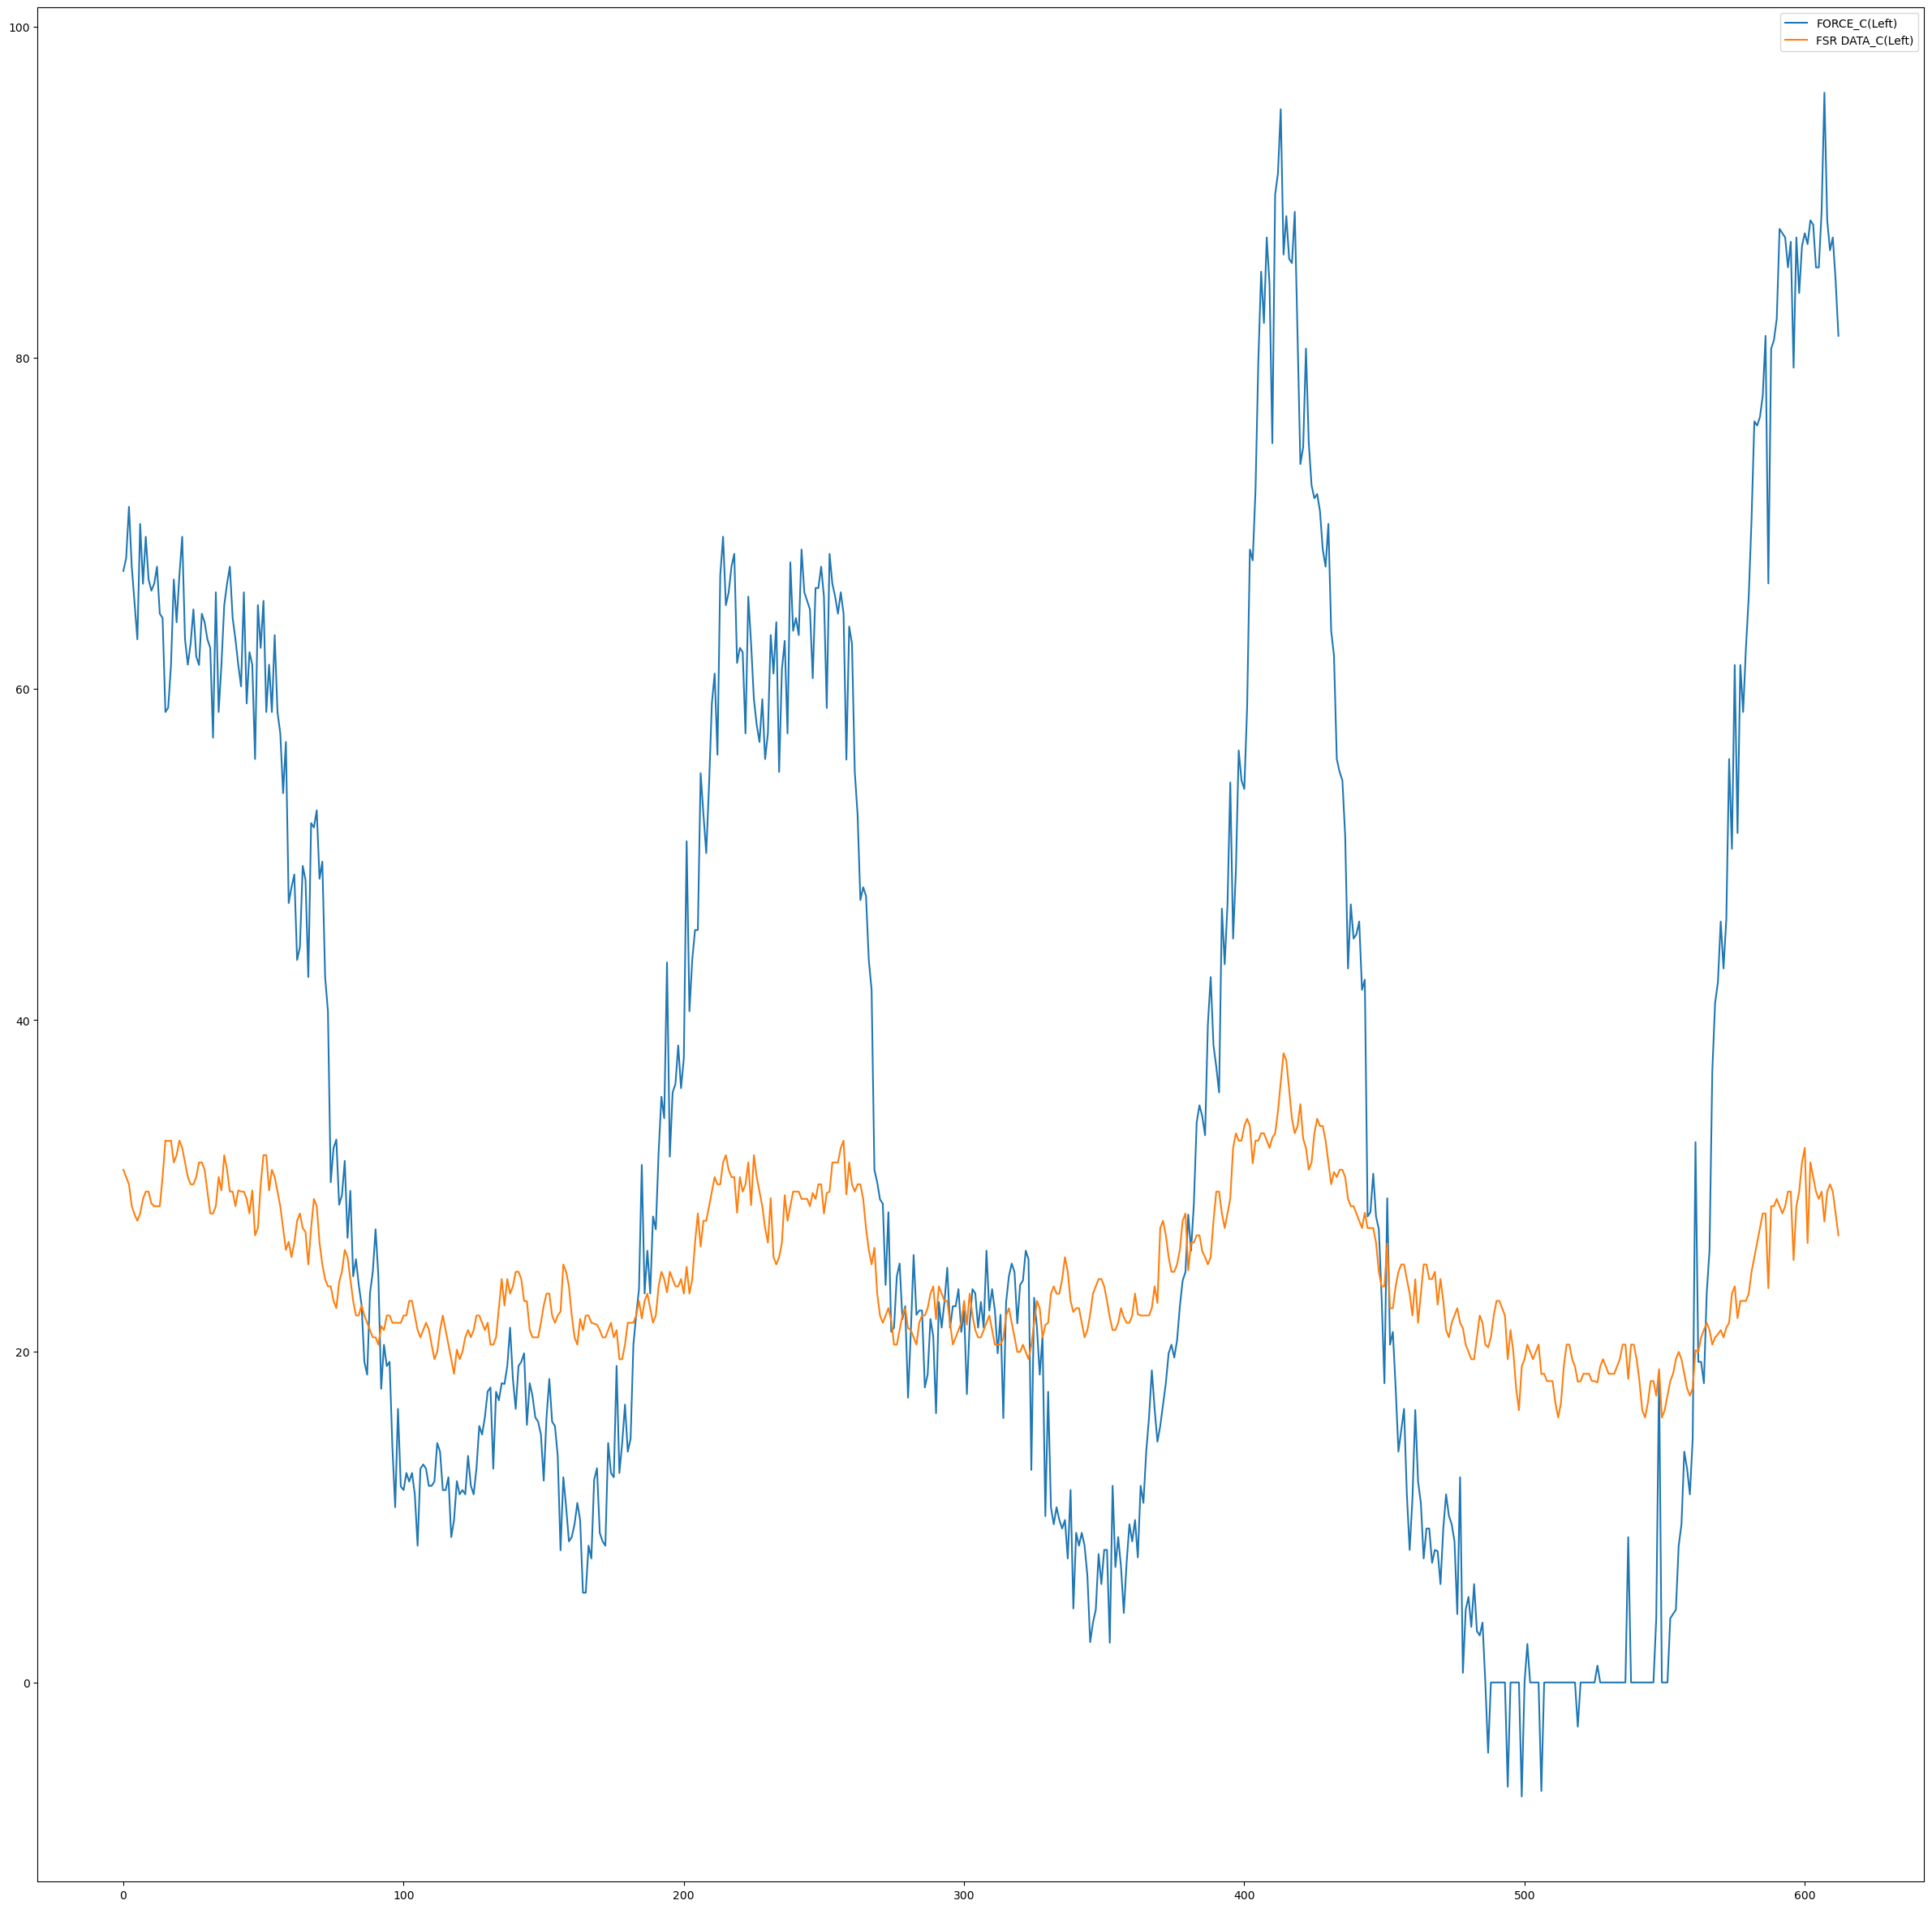

In [116]:
L = pd.DataFrame(scaler.inverse_transform(L))
L_sca=L.set_axis(["FORCE_C(Left)","FSR DATA_C(Left)"],axis="columns")
L_sca.plot(figsize=(30,30))